# How do different classes of immigrants (economic, family, refugee, and others) assess their workplace differently?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install matplotlib pillow numpy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load  dataset
df = pd.read_csv("/content/drive/MyDrive/merged_access_immigration_RQ2.csv")

df.head()

,CMANAME,CMAUID,CSDNAME,CSDUID,public_caf,public_ef,public_emp,public_gs,public_hf,public_psef,...,walk_srf,ada_code_n,ADA_code,T1528,T1536,T1537,T1670,T1673,T1674,T1675
0,Weak metropolitan influenced zone (N.L.) / Zon...,998,Old Perlican,1001343,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000459,10010001,10010001,8685.0,0.0,10.0,15.0,15.0,0.0,0.0
1,St. John's,1,Pouch Cove,1001505,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.003352,10010002,10010002,4145.0,0.0,0.0,10.0,15.0,0.0,0.0
2,Weak metropolitan influenced zone (N.L.) / Zon...,998,"Division No. 1, Subd. I",1001374,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.001829,10010003,10010003,10500.0,15.0,20.0,60.0,45.0,0.0,0.0
3,St. John's,1,St. John's,1001519,0.008549,0.008819,0.008912,24.173913,0.008047,0.016364,...,0.030279,10010004,10010004,8805.0,295.0,220.0,595.0,165.0,80.0,0.0
4,St. John's,1,Torbay,1001509,0.000000,0.000000,0.000131,NaN,0.000138,0.000000,...,0.004962,10010005,10010005,9130.0,35.0,0.0,90.0,65.0,0.0,0.0


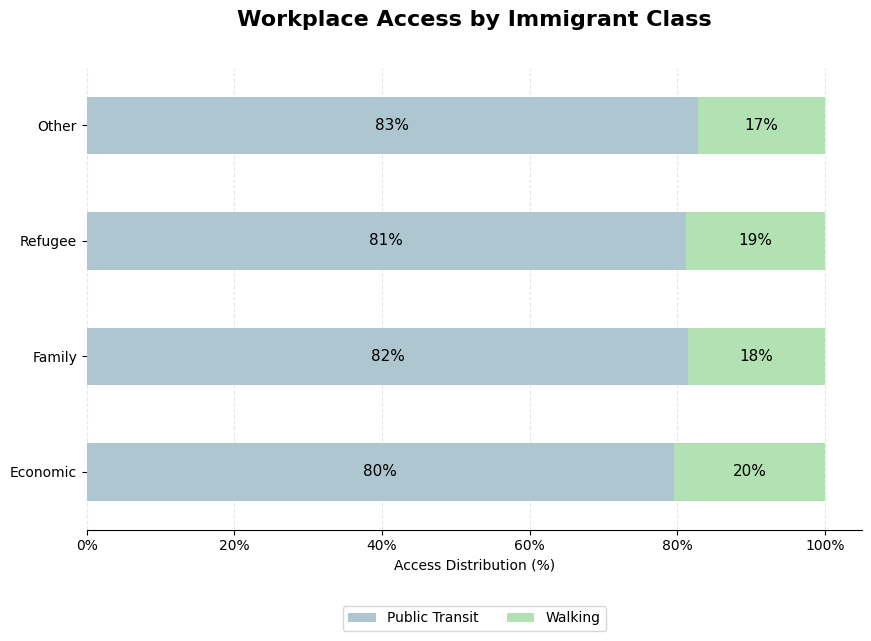

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

#  1. Weighted Access Data Calculation
# Create a new column that stores the total number of immigrants (all classes combined) per area (e.g., ADA)
df["total_immigrants"] = df[["T1670", "T1673", "T1674", "T1675"]].sum(axis=1)
# This function calculates the weighted average of an access score (e.g., public_emp or walk_emp),
# using the number of immigrants in each area as the weight.
def weighted_avg(access_col, weight_col):
    return (df[access_col] * df[weight_col]).sum() / df[weight_col].sum()

classes = {
    "Economic": "T1670",
    "Family": "T1673",
    "Refugee": "T1674",
    "Other": "T1675"
}

# Collect raw average scores
data = {"Immigrant Class": [], "Public Transit": [], "Walking": []}
for label, col in classes.items():
    pub = weighted_avg("public_emp", col) # weighted avg public transit access
    walk = weighted_avg("walk_emp", col)# weighted avg walking access
    total = pub + walk# total access score (before normalization)
     # Normalize to 100% scale for stacked bar chart (i.e., relative access mode share)
    data["Immigrant Class"].append(label)
    data["Public Transit"].append(pub / total) #percent
    data["Walking"].append(walk / total)

plot_df = pd.DataFrame(data).set_index("Immigrant Class")

#  2. Color Palette
pastel_blue = '#AEC6CF'
pastel_green = '#B2E2B3'

# 3. Plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_df.plot(kind='barh', stacked=True, color=[pastel_blue, pastel_green], ax=ax)

ax.set_title("Workplace Access by Immigrant Class", fontsize=16, weight='bold', pad=30)
ax.set_xlabel("Access Distribution (%)")
ax.set_ylabel("")
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

#  Format x-axis ticks as percentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

#  4. Add Percent Labels Inside Each Bar
for i, (idx, row) in enumerate(plot_df.iterrows()):
    pt_pct = int(round(row["Public Transit"] * 100))
    walk_pct = 100 - pt_pct
    ax.text(row["Public Transit"] / 2, i, f"{pt_pct}%", ha='center', va='center', fontsize=11, color='black')
    ax.text(row["Public Transit"] + row["Walking"] / 2, i, f"{walk_pct}%", ha='center', va='center', fontsize=11, color='black')

# 5. Custom Legend
legend_elements = [
    mpatches.Patch(facecolor=pastel_blue, label='Public Transit'),
    mpatches.Patch(facecolor=pastel_green, label='Walking')
]
ax.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

# 6. Export (Optional)
plt.savefig("/content/drive/MyDrive/Mosaic Migrants Data Challenge /output/RQ2/workplace_access_by_class.png", dpi=300, bbox_inches='tight')
plt.show()


#  workplace access between areas with higher vs. lower than average immigrant populations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load merged dataset
df = pd.read_csv("/content/drive/MyDrive/merged_access_immigration_RQ2.csv")
# Calculate % of recent immigrants in each ADA
df["pct_recent_immigrants"] = df["T1536"] / (df["T1528"] + df["T1536"])

# Split areas into high and low immigrant concentration
threshold = df["pct_recent_immigrants"].mean()
df["Immigrant Density Group"] = df["pct_recent_immigrants"].apply(lambda x: "High Immigrant Areas" if x > threshold else "Low Immigrant Areas")


In [ ]:
#Calculate Average Workplace Access Per Group
grouped = df.groupby("Immigrant Density Group")[["public_emp", "walk_emp"]].mean().reset_index()


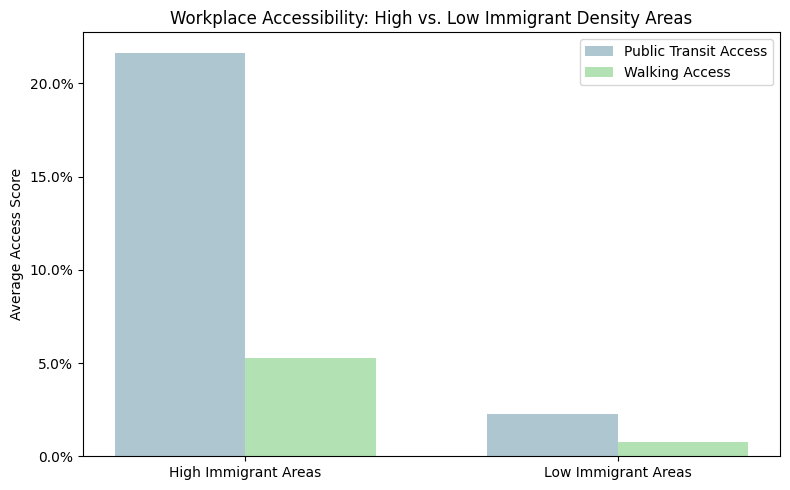

In [ ]:
# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(grouped))

# Bars
ax.bar(x, grouped["public_emp"], width=bar_width, label="Public Transit Access", color="#AEC6CF")
ax.bar([p + bar_width for p in x], grouped["walk_emp"], width=bar_width, label="Walking Access", color="#B2E2B3")

# X-axis

ax.set_ylabel("Average Access Score (%)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # assuming scores are normalized between 0 and 1
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(grouped["Immigrant Density Group"])
ax.set_ylabel("Average Access Score")
ax.set_title("Workplace Accessibility: High vs. Low Immigrant Density Areas")
ax.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Mosaic Migrants Data Challenge /output/RQ2/Workplace Accessibility: High vs. Low Immigrant Density Areas.png", dpi=300, bbox_inches='tight')
plt.show()


#  education access between areas with higher vs. lower than average immigrant populations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load merged dataset
df = pd.read_csv("/content/drive/MyDrive/merged_access_immigration_RQ2.csv")
# Calculate % of recent immigrants in each ADA
df["pct_recent_immigrants"] = df["T1536"] / (df["T1528"] + df["T1536"])

# Split areas into high and low immigrant concentration
threshold = df["pct_recent_immigrants"].mean()
df["Immigrant Density Group"] = df["pct_recent_immigrants"].apply(lambda x: "High Immigrant Areas" if x > threshold else "Low Immigrant Areas")


In [ ]:
#Calculate Average Workplace Access Per Group
grouped = df.groupby("Immigrant Density Group")[["public_ef", "walk_ef"]].mean().reset_index()


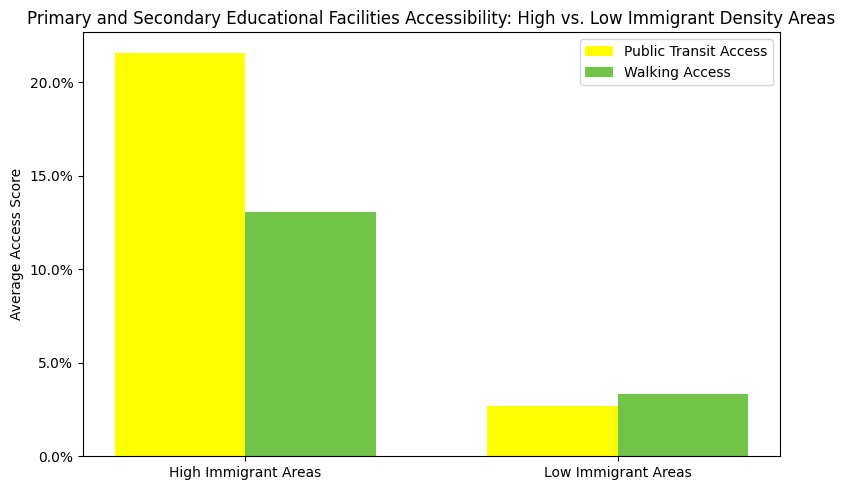

In [ ]:
# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
x = range(len(grouped))

# Bars
ax.bar(x, grouped["public_ef"], width=bar_width, label="Public Transit Access", color="#ffff00")
ax.bar([p + bar_width for p in x], grouped["walk_ef"], width=bar_width, label="Walking Access", color="#71c447")

# X-axis

ax.set_ylabel("Average Access Score (%)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # assuming scores are normalized between 0 and 1
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(grouped["Immigrant Density Group"])
ax.set_ylabel("Average Access Score")
ax.set_title("Primary and Secondary Educational Facilities Accessibility: High vs. Low Immigrant Density Areas")
ax.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Mosaic Migrants Data Challenge /output/RQ2/Workplace Accessibility: Primary and Secondary Educational Facilities Accessibility: High vs. Low Immigrant Density Areas.png", dpi=300, bbox_inches='tight')
plt.show()
